## COGS 182 Homework 6
Malachi Mabie 
14 Feb 2021

###Question 1 (2 points)
Exercise 6.2 This is an exercise to help develop your intuition about why TD methods are often more efficient than Monte Carlo methods. Consider the driving home example and how it is addressed by TD and Monte Carlo methods. Can you imagine a scenario in which a TD update would be better on average than a Monte Carlo update? Give an example scenario—a description of past experience and a current state—in which you would expect the TD update to be better. Here’s a hint: Suppose you have lots of experience driving home from work. Then you move to a new building and a new parking lot (but you still enter the highway at the same place). Now you are starting to learn predictions for the new building. Can you see why TD updates are likely to be much better, at least initially, in this case? Might the same sort of thing happen in the original scenario?

> In the example, TD updates are helpful because it clarifies the difference in environment model - there's a way to incorporate the information about building change. Monte Carlo doesn't use a model, so it wouldn't be able to directly use that intelligence. It would take longer because it couldn't dynamically change predictions based on state results while the episode takes place, instead waiting till the end. On page 123, a diagram visualizes how the learning in monte carlo would react to a total change, while TD can react to step changes. Using the hint example, TD would recallibrate its prediction once we entered the highway in a familiar place, whereas MC would have to assimilate the overall pattern after more runs. **However,** if the environment is unchanging or we have no TD-usable information to add, Monte Carlo is a better choice.



###Question 2 (4 points)
Use TD(0) with alpha = 0.1 to learn the values of a modified version of Example 6.2 Random Walk. Instead of 5 states, there are now 7 states. The starting state is still the middle state, and the probability of right and left are both 0.5. Plot the estimated values after 1,10,100, and 1000 episodes. Plot the empirical RMS error averaged over states for your TD(0) with alpha = 0.1. (This is only one line from the right-hand plot in example 6.2). How does the modified version compare to the 5 state version? 


In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

####This is my original attempt:

In [ ]:
def tdzero(num_states=7, alpha=0.1, gamma=1, ep_count=1000, verbose=True):
  print_at = [1,10,100,ep_count] # print value estimates at
  np.set_printoptions(precision=3)
  step_count = 50                  # max episode length

  # initialize V(s) arbitrarily for all states except V(terminal)=0 & mid = 1/2
  val_est = np.ones(num_states)*.5

  true_val = []
  for i in range(1,num_states+1):
    true_val.append((i)/(num_states+1))

  if verbose:
    print("have: ",val_est)
    print("want: ",true_val,'\n')
  rms_err = []

  # episodes loop
  for i in range(1, ep_count+1):

    # init S
    state = num_states // 2

  
    # steps loop
    while state >= 0 and state < num_states:
      # policy: 50% probability choice
      policy = random.getrandbits(1)
      # generate action
      n_state = state + 2*policy - 1
      # take action, observe R and S'
      reward = 1 if n_state == num_states else 0
      # TD bootstrap: make a V(S) to influence update
      next_val = 0 if n_state < 0 or n_state >= num_states else val_est[n_state]
      val_est[state] += alpha*(reward + gamma*next_val - val_est[state])
      # get next state
      state = n_state

    # RMS error
    rms_err.append(np.sqrt(np.mean(np.square(true_val - val_est))))
    
    if i in print_at and verbose:
      print('k = ',i)
      print(val_est)
  
  # plot RMS / episode
  plt.plot(rms_err[:100], label=f'{num_states} states; alpha {alpha}')
  plt.title("Empirical RMS error, averaged over states")
  plt.xlabel("Walks / Episodes")
  plt.legend()

have:  [0.5 0.5 0.5 0.5 0.5 0.5 0.5]
want:  [0.125, 0.25, 0.375, 0.5, 0.625, 0.75, 0.875] 

k =  1
[0.5  0.5  0.5  0.5  0.5  0.5  0.55]
k =  10
[0.312 0.452 0.491 0.503 0.517 0.554 0.668]
k =  100
[0.07  0.179 0.41  0.568 0.666 0.789 0.919]
k =  1000
[0.058 0.211 0.305 0.519 0.656 0.802 0.887]


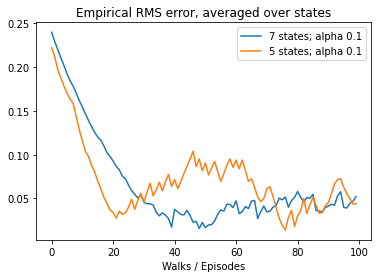

In [ ]:
tdzero()
tdzero(num_states=5, verbose=False)

The rate of learning is highly dependant on the alpha. With higher alpha you get reasonable values quicker, but with a bit more noise that prevents it from converging as close as lower alpha eventually does.

In the book, the graph for the 5 state random walk appears to settle to its lowest error (roughly 0.04) at around episode 40, then increase to around .06 error by episode 100.

My 7 state walk settles around episode 40 as well, but with around .03 error and a cyclic downwards walk between .05 and .01.

This looks a bit better than the 5 state walk, but the change looked much more eratic than their graph. So, I graphed a 5 state walk as well, and found that while it achieved a similar minimum error to the book, it moved much more erratically. I wonder if some different gamma or RMS technique was employed in the book configuration.

Running it a few more times completely obliterated the minute points of these observations.

Overall though, it appears more states may sometimes achieve higher overall accuracy with TD(0) than fewer states, but that they are very similar overall.

#### This is my writeup of the discussion session approach - his graphs are smoother because he averages over 100 runs.

In [34]:
num_states = 8
alpha = 0.1
gamma = 1.0

true_values = [0,1/8,1/4,3/8,1/2,5/8,3/4,7/8]
val_hist = np.zeros([101,num_states])
RMS = np.zeros(100)

for i in range(100):
  values = np.ones(num_states)*0.5
  values[0] = 0
  val_hist[0] = values

  for j in range(100):
    state = 4

    for k in range(100):
      if state > 0:
        # policy
        transition = 1
        if np.random.random() > 0.5:
          transition = -1
        n_state = state + transition

        r = 0
        if n_state == 8:
          r = 1 # finished
          n_state = 0
        values[state] += alpha*(r+values[n_state]-values[state])

      state = n_state

    val_hist[j+1] = values

    RMS[j] += np.sqrt(np.sum((values-true_values)**2)/7)/100


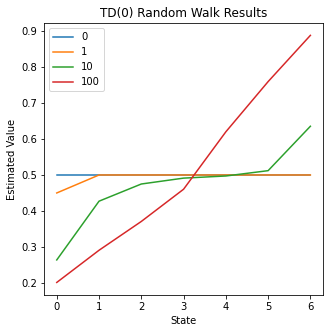

In [40]:
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(5,5))

for i in [0,1,10,100]:
  ax.plot(val_hist[i,1:], label = i)
plt.xlabel("State")
plt.ylabel("Estimated Value")
plt.title("TD(0) Random Walk Results")
ax.legend()

Text(0.5, 1.0, 'Ta Solution for TD(0) Random Walk')

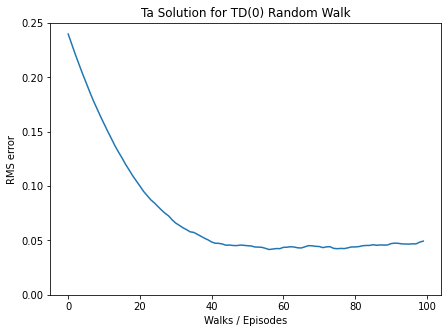

In [43]:
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(7,5))

ax.plot(RMS)
ax.set_ylim(ymin=0,ymax=0.25)
plt.ylabel("RMS error")
plt.xlabel("Walks / Episodes")
plt.title("Ta Solution for TD(0) Random Walk")

###Question 3 (2 points extra credit)
Use TD(0) with alpha = 0.1 to learn the state values for an equiprobable policy for the gridworld of Example 4.1. Show the value function that TD(0) converges to. How does this compare to the value function that dynamic programming converges to? 


In [32]:
transitions = np.array([[0,0,0,0],[0,1,2,5],[1,2,3,6],[2,3,3,7],
                        [4,0,5,8],[4,1,6,9],[5,2,7,10],[6,3,7,11],
                        [8,4,9,12],[8,5,10,13],[9,6,11,14],[10,7,11,0],
                        [12,8,13,12],[12,9,14,13],[13,10,0,14],[0,0,0,0]])

In [30]:
# TD(0) with alpha=0.1
def td_zero(num_eps=10000, alpha=0.01):
  num_states = transitions.shape[0]
  values = np.zeros(num_states)
  print_at = [num_eps]

  for i in range(1,num_eps+1):
    state = np.random.randint(0,15)

    # generate an episode
    for step in range(100):
      if state > 0:
        action = np.random.randint(0,4)
        r = -1
        n_state = np.int(transitions[state,action])
        values[state] += alpha*(r+values[n_state]-values[state])
        state = n_state
    # print requested iterations
    if i in print_at:
      print('k = ',i)
      display(pd.DataFrame(np.round(values,1).reshape(4,4)))

In [31]:
td_zero()

k =  10000


,0,1,2,3
0,0.0,-13.2,-20.3,-22.4
1,-13.6,-17.4,-19.9,-20.1
2,-19.6,-19.5,-17.6,-13.6
3,-21.6,-19.9,-13.2,0.0


because of the alpha the numbers aren't perfect, but pretty close to dynamic programming's results:

In [23]:
# Dynamic Programming
pd.set_option("display.precision", 2)
# recreating original reward function
v = np.zeros(16)
for i in range(10000):
  vn = np.zeros(16)
  for i in range(1,15):
    vn[i] = -1 + .25*(v[transitions[i][0]] + v[transitions[i][1]] 
                     + v[transitions[i][2]] + v[transitions[i][3]])
  v = vn
display(pd.DataFrame(np.reshape(v,(-1,4))))

,0,1,2,3
0,0.0,-14.0,-20.0,-22.0
1,-14.0,-18.0,-20.0,-20.0
2,-20.0,-20.0,-18.0,-14.0
3,-22.0,-20.0,-14.0,0.0


###Question 4 (4 points)
Use Q-learning (pseudo code at the bottom of pg 131) to learn a policy and value function for the gridworld of Example 4.1. Show the value function (max Q value for a given state) after 10, 100, and 1000 episodes. How quickly do the policy and q values converge? [You can again use random start to initialize the state in each episode. You can use an e-greedy policy with epsilon = 0.1.]

**Q-learning (off-policy TD control) for estimating $\pi \approx \pi_*$**
- step size $\alpha \in (0,1]$, small $\epsilon > 0$
- Init $Q(s,a)$ for all $s \in S^+, a\in A(s)$, arbirarily except that $Q(terminal,\cdot)=0$.

In [54]:
def q_learning(alpha=0.1, epsilon=0.1, episodes=1000):
  num_states = transitions.shape[0]
  values = np.zeros(num_states)
  print_at = [3,10,30,50,100,300,500,episodes]
  # set gamma to 1
  gamma = 1.0

  # initialize Q(s,a) arbitrarily besides terminal = 0
  qvalues = np.zeros([num_states, 4])

  for i in range(1,episodes+1):
    # initialize S:
    state = np.random.randint(0,15)

    for j in range(100):
      # until S is terminal
      if state > 0:

        # epsilon-random policy
        if np.random.random() < epsilon:
          action = np.random.randint(0,4)
        else:
          action = np.argmax(qvalues[state])

        # Take action A, observe R, S'
        r = -1
        n_state = np.int(transitions[state,action])
        max_q = np.max(qvalues[n_state])

        # Q(S,A) = Q(S,A) + alpha(R + gamma*max_a(Q(S',a) - Q(S,A))
        qvalues[state,action] += alpha*(r + gamma*max_q - qvalues[state,action])

        # S = S'
        state = n_state

    if i in print_at:
      print('k= ',i)
      print(np.round(np.max(qvalues,1),1).reshape(4,4))
      print()


In [55]:
q_learning()

k=  3
[[ 0.   0.  -0.1  0. ]
 [ 0.   0.  -0.1  0. ]
 [-0.1 -0.1 -0.1  0. ]
 [ 0.   0.   0.   0. ]]

k=  10
[[ 0.  -0.2 -0.2 -0.2]
 [-0.2 -0.3 -0.2 -0.2]
 [-0.3 -0.3 -0.2 -0.2]
 [-0.2 -0.3 -0.2  0. ]]

k=  30
[[ 0.  -0.5 -0.7 -0.7]
 [-0.4 -0.6 -0.7 -0.7]
 [-0.6 -0.8 -0.6 -0.5]
 [-0.7 -0.7 -0.5  0. ]]

k=  50
[[ 0.  -0.7 -1.  -1.1]
 [-0.7 -0.9 -1.  -1. ]
 [-0.9 -1.  -0.9 -0.7]
 [-0.9 -0.9 -0.7  0. ]]

k=  100
[[ 0.  -0.9 -1.4 -1.6]
 [-0.9 -1.3 -1.4 -1.5]
 [-1.4 -1.4 -1.3 -0.9]
 [-1.5 -1.3 -0.9  0. ]]

k=  300
[[ 0.  -1.  -1.9 -2.4]
 [-1.  -1.8 -2.2 -2. ]
 [-1.9 -2.2 -1.8 -1. ]
 [-2.2 -1.9 -1.   0. ]]

k=  500
[[ 0.  -1.  -2.  -2.6]
 [-1.  -1.9 -2.4 -2. ]
 [-2.  -2.6 -2.  -1. ]
 [-2.7 -2.  -1.   0. ]]

k=  1000
[[ 0.  -1.  -2.  -3. ]
 [-1.  -2.  -2.9 -2. ]
 [-2.  -2.8 -2.  -1. ]
 [-3.  -2.  -1.   0. ]]



> It looks like it converged to a workable ballpark at around 300 episodes, with vanity-level accuracy by 1000.

